In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.drop('species', axis = 1 ,inplace = True)  

In [5]:
x = df.drop('petal_width' , axis = 1)
y = df['petal_width']

In [6]:
x.sample(5)

,sepal_length,sepal_width,petal_length
26,5.0,3.4,1.6
134,6.1,2.6,5.6
148,6.2,3.4,5.4
56,6.3,3.3,4.7
41,4.5,2.3,1.3


In [7]:
x.shape, y.shape

((150, 3), (150,))

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [9]:
x_train, x_test, y_train , y_test = train_test_split(x,y, test_size = 0.2 , random_state = 0)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
mse = cross_val_score(lin_reg,x_train,y_train,scoring='neg_mean_squared_error',cv = 5)
print(mse)


[-0.04434501 -0.02569616 -0.03056597 -0.03340797 -0.04341945]


In [11]:
mean_mse = np.mean(mse)
mean_mse

-0.03548691196545169

In [12]:
y_pred = lin_reg.predict(x_test)
r2_score = r2_score(y_pred,y_test)
print(r2_score)

0.8938765510181722


In [13]:
mean_absolute_error(y_test,y_pred)

0.1693268164410859

In [14]:

from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(y_test,y_pred))
print(rmse)

0.22717233680369572


#  Missing imputation

In [15]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

No missing values in Features

# Correlation

In [16]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


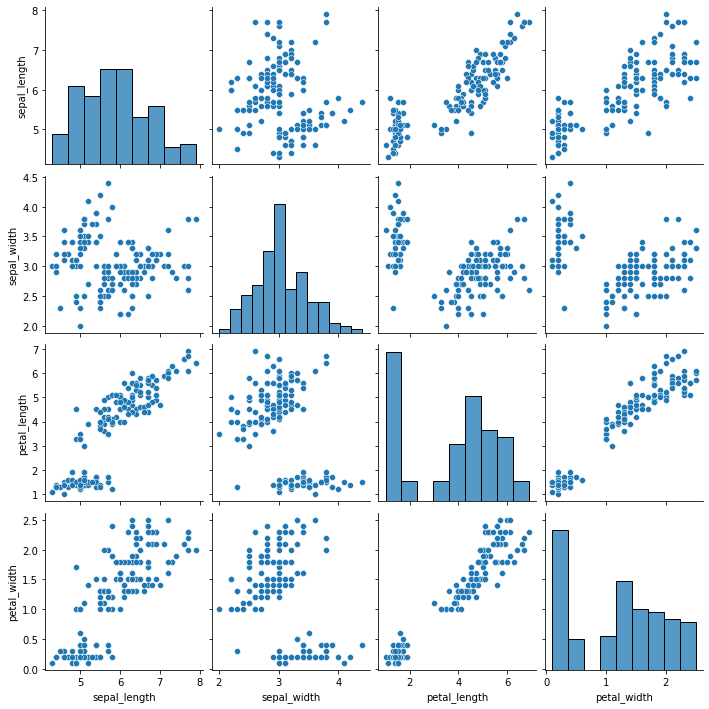

In [17]:
import seaborn as sns
sns.pairplot(df)

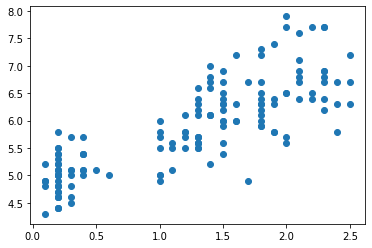

In [18]:
import matplotlib.pyplot as plt
plt.scatter(df['petal_width'],df['sepal_length'])
plt.show()

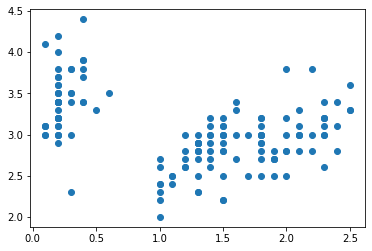

In [19]:
import matplotlib.pyplot as plt
plt.scatter(df['petal_width'],df['sepal_width'])
plt.show()

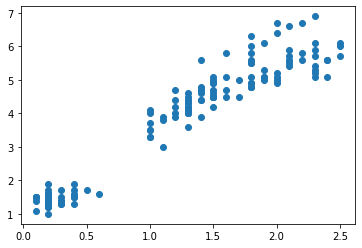

In [20]:
import matplotlib.pyplot as plt
plt.scatter(df['petal_width'],df['petal_length'])
plt.show()

Peta_length is highly correlated with petal_width. So, we can reduce Petal_length

# PCA

In [21]:
from sklearn.decomposition import PCA
pca = PCA()
X = pca.fit_transform(x)

In [22]:
pca.get_covariance()

array([[ 0.68569351, -0.03926846,  1.27368233],
       [-0.03926846,  0.18800403, -0.32171275],
       [ 1.27368233, -0.32171275,  3.11317942]])

In [23]:
import json
with open('algo.json' , 'r') as f:
    data = json.load(f)

In [24]:
print(data['design_state_data']['target']['type'])

regression


# Regression type and applied metrics and gridsearchcv 

In [25]:
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics  import r2_score,mean_absolute_error, mean_squared_error
from math import sqrt

In [38]:
def algorithm(prediction_type):
   
    regre = reg.fit(x_train,y_train)
   
    y_pred = regre.predict(x_test)
   
    r2_score_accuracy = r2_score(y_pred,y_test)
   
    print('r2_score:',r2_score_accuracy)
   
    print('MAE',mean_absolute_error(y_test,y_pred))
   
    print('mse:',mean_squared_error(y_test,y_pred))
   
    print('rmse:',sqrt(mean_squared_error(y_test,y_pred)))

   


prediction_type = input("enter ml algo:")
ml_algarithom = ['Linear regression','Ridge Regression', 'Lasso Regression',
                'KNN','Decission Tree','SVM','Random Forest','AdBoost',
                 'Gradient Boost','XgBoost']

for prediction_type in ml_algarithom:
    if prediction_type == 'Linear regression':
        reg = LinearRegression()
        break
   
    elif prediction_type == 'Ridge Regression':
        reg = Ridge(alpha = 10)
        params = {'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,1e-2,1e-1,1,5,10,20,30,35,40,45,50,55,100]}
        reg = GridSearchCV(ridge,params,scoring = 'neg_mean_squared_error',cv = 5)
        break
       
    elif prediction_type == 'Lasso Regression':
       
        reg = Lasso(alpha = 0.001)
        parmas = {'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,1e-2,1e-1,1,5,10,20,30,35,40,45,50,55,100]}
        lasso_regressor = GridSearchCV(lasso,parmas,scoring = 'neg_mean_squared_error',cv = 5)
       
    elif prediction_type == 'KNN':
        reg = KNeighborsRegressor(n_neighbors = 3)
        break
   
    elif prediction_type == 'Decission Tree':
        reg = DecisionTreeRegressor(max_depth = 6)
        break
       
    elif prediction_type == 'SVM':
        SVR(kernel='rbf', C = 10000, epsilon = 0.1)
        break
   
    elif prediction_type == 'Random Forest':
        reg = RandomForestRegressor(n_estimators = 100,
                              random_state = 3,
                              max_samples = 0.5,
                              max_features = 0.75,
                              max_depth = 15)
       
    elif prediction_type == 'AdBoost':
        AdaBoostRegressor(n_estimators = 15,learning_rate = 1.0)
        break
       
    else:
        reg = XGBRegressor(n_estimators = 45,max_depth = 5, learning_rate = 0.5)
       

        break


algorithm(prediction_type)


       

       


enter ml algo:'Linear regression'
r2_score: 0.8938765510181722
MAE 0.1693268164410859
mse: 0.051607270608851764
rmse: 0.22717233680369572
